### Import Data

In [374]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


### Reading the comma separated values file into the dataframe

In [375]:
GenReg_ds = pd.read_csv('/content/transcripts_features.csv')

In [376]:
GenReg_ds.head(10)

,Unnamed: 0,voice_filename,transcript,accent,gender,tone,mfcc_mean,chroma_mean,contrast_mean,centroid_mean,bandwidth_mean,zero_crossings_mean,pitch_mean,formants_mean,energy,tempo,meanfreq,dfrange,median,label
0,0,voice_1.mp3,چرا این‌‌‌‌طور فکر می‌‌‌‌کنی؟,فارسی,male,question,[-226.45906 27.234396 -4.854726 1...,[0.631335 0.5893609 0.59790057 0.6132906 0...,[27.92413731 12.36858302 15.13017475 15.271798...,3002.330924,2087.859977,0.304001,188.273514,2.950000e-07,56.331367,267.857143,3002.330924,2032.816684,2894.636224,male
1,1,voice_2.mp3,همیشه من و تو راجع به آن با هم صحبت کرده‌‌‌‌ایم,فارسی,male,normal,[-341.25583 -10.133878 5.558397 17.9...,[0.38676995 0.33763474 0.3399514 0.38050535 0...,[27.67936516 14.14293756 17.84834701 18.141986...,3716.514567,2131.470004,0.415193,140.911057,-4.450000e-08,67.349335,110.294118,3716.514567,3120.362780,3665.778826,male
2,2,voice_3.mp3,دنیا در حال گذار به‌‌‌‌سمت پایداری است,فارسی,male,normal,[-308.26108 -7.790743 6.654821 9.6...,[0.40178165 0.3928808 0.37732053 0.48148748 0...,[27.21609872 13.85584494 18.61779162 20.051397...,3715.257064,2089.085343,0.427597,120.621612,4.350000e-08,90.469215,133.928571,3715.257064,4578.777198,3572.828536,male
3,3,voice_4.mp3,شاخصی که باید عملکرد تسلا را با آن اندازه بگیریم,فارسی,male,normal,[-324.18372 -12.081556 0.6377594 17.1...,[0.4548103 0.33421117 0.3522711 0.37673205 0...,[26.48621316 14.083843 18.3248408 18.592037...,3742.295518,1994.383106,0.423299,145.767975,-5.410000e-08,285.061188,93.750000,3742.295518,4627.715878,4017.854936,male
4,4,voice_5.mp3,باید تعداد واقعاً غیرقابل‌‌‌‌تصوری باتری تولید...,فارسی,male,normal,[-273.72803 4.334649 -1.7544707 1...,[0.4542341 0.41574174 0.44602737 0.4391814 0...,[27.70968228 13.96555351 18.92690269 18.205079...,3451.477394,2081.125187,0.387289,129.165787,-2.380000e-08,122.441605,156.250000,3451.477394,4766.202466,3391.330732,male
5,5,voice_6.mp3,انرژی پایدار در وهلۀ اول یعنی انرژی خورشیدی و ...,فارسی,male,normal,[-302.059 -6.7070937 3.8271344 34.1...,[0.53401506 0.3742721 0.34742776 0.39353797 0...,[28.60703425 15.6157436 19.61510722 18.950154...,3401.908845,2035.803166,0.351243,118.902389,-1.700000e-08,67.736877,104.166667,3401.908845,4421.729756,3335.039153,male
6,6,voice_7.mp3,در اینجا مسئله تقاضای مصرف‌‌‌‌کننده نیست,فارسی,male,normal,[-293.4595 -2.8754332 11.646889 13.6...,[0.33034706 0.29326648 0.31138957 0.338606 0...,[29.40941599 16.43361325 19.15813734 17.803638...,3641.867364,2070.842923,0.365571,77.550262,3.350000e-08,114.288361,125.000000,3641.867364,5032.010548,3547.796486,male
7,7,voice_8.mp3,فکر می‌‌‌‌کنی چقدر تحقق این ایده را جلو انداخت...,فارسی,male,normal,[-2.7290021e+02 3.4959974e+00 -7.7369061e+00 ...,[0.4115959 0.4718455 0.41229397 0.37912908 0...,[29.56311157 15.58492333 18.6550123 17.670257...,3362.352062,2015.983243,0.338487,107.741921,-4.890000e-08,105.185349,93.750000,3362.352062,3909.798026,3340.610484,male
8,8,voice_9.mp3,دستیابی به تولید با حجم بالا و داشتن جریان وجو...,فارسی,male,normal,[-253.11868 7.299917 -11.878819 24.0...,[0.49317783 0.3818179 0.3938838 0.4169523 0...,[28.99676989 15.2654415 18.62148994 17.820657...,3277.832214,1975.092939,0.332188,113.812653,1.500000e-08,217.673096,144.230769,3277.832214,4725.157948,3105.385409,male
9,9,voice_10.mp3,ما صدها شرکت استارتاپ خودرویی داشته‌‌‌‌ایم,فارسی,male,normal,[-254.24596 14.344409 7.4916415 20.4...,[0.55779254 0.4428275 0.44858646 0.45065686 0...,[25.31387743 12.91252597 17.09815441 18.133631...,3318.762729,2053.700936,0.347452,139.650085,-1.730000e-07,233.458878,98.684211,3318.762729,4163.872478,3155.005700,male


In [377]:
GenReg_ds.shape

(6042, 20)

In [378]:
GenReg_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6042 non-null   int64  
 1   voice_filename       6042 non-null   object 
 2   transcript           6042 non-null   object 
 3   accent               6042 non-null   object 
 4   gender               6042 non-null   object 
 5   tone                 6042 non-null   object 
 6   mfcc_mean            6042 non-null   object 
 7   chroma_mean          6042 non-null   object 
 8   contrast_mean        6042 non-null   object 
 9   centroid_mean        6042 non-null   float64
 10  bandwidth_mean       6042 non-null   float64
 11  zero_crossings_mean  6042 non-null   float64
 12  pitch_mean           6042 non-null   float64
 13  formants_mean        6042 non-null   float64
 14  energy               6042 non-null   float64
 15  tempo                6042 non-null   f

In [379]:
GenReg_ds.describe()

,Unnamed: 0,centroid_mean,bandwidth_mean,zero_crossings_mean,pitch_mean,formants_mean,energy,tempo,meanfreq,dfrange,median
count,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000,6.042000e+03,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000
mean,3020.500000,2946.353858,1830.851651,0.292715,89.425464,1.053139e-06,188.014545,120.076006,2946.353858,4244.921453,2752.160190
std,1744.319495,514.138135,238.574830,0.064070,31.073661,2.143524e-04,205.968974,29.535174,514.138135,633.412309,588.240329
min,0.000000,1211.383990,964.516766,0.111397,12.460518,-6.304739e-03,1.589549,49.342105,1211.383990,1643.985583,1100.756900
25%,1510.250000,2614.443391,1698.685017,0.249784,66.916609,-2.150000e-07,69.489637,98.684211,2614.443391,3821.057246,2349.709969
50%,3020.500000,2948.097080,1883.215322,0.283855,86.932137,-4.505000e-09,127.285854,117.187500,2948.097080,4236.487752,2734.152212
75%,4530.750000,3297.615054,2000.500074,0.329858,108.934307,2.637500e-08,228.906372,133.928571,3297.615054,4685.385443,3119.218118
max,6041.000000,4487.562284,2461.147785,0.554474,213.895767,3.697412e-03,2754.958984,312.500000,4487.562284,6585.751460,4754.210030


#### To find count of Null values

In [380]:
GenReg_ds.isnull().sum()

Unnamed: 0             0
voice_filename         0
transcript             0
accent                 0
gender                 0
tone                   0
mfcc_mean              0
chroma_mean            0
contrast_mean          0
centroid_mean          0
bandwidth_mean         0
zero_crossings_mean    0
pitch_mean             0
formants_mean          0
energy                 0
tempo                  0
meanfreq               0
dfrange                0
median                 0
label                  0
dtype: int64

### To find the category type features

In [381]:
GenReg_ds.select_dtypes(include=['object']).head()

,voice_filename,transcript,accent,gender,tone,mfcc_mean,chroma_mean,contrast_mean,label
0,voice_1.mp3,چرا این‌‌‌‌طور فکر می‌‌‌‌کنی؟,فارسی,male,question,[-226.45906 27.234396 -4.854726 1...,[0.631335 0.5893609 0.59790057 0.6132906 0...,[27.92413731 12.36858302 15.13017475 15.271798...,male
1,voice_2.mp3,همیشه من و تو راجع به آن با هم صحبت کرده‌‌‌‌ایم,فارسی,male,normal,[-341.25583 -10.133878 5.558397 17.9...,[0.38676995 0.33763474 0.3399514 0.38050535 0...,[27.67936516 14.14293756 17.84834701 18.141986...,male
2,voice_3.mp3,دنیا در حال گذار به‌‌‌‌سمت پایداری است,فارسی,male,normal,[-308.26108 -7.790743 6.654821 9.6...,[0.40178165 0.3928808 0.37732053 0.48148748 0...,[27.21609872 13.85584494 18.61779162 20.051397...,male
3,voice_4.mp3,شاخصی که باید عملکرد تسلا را با آن اندازه بگیریم,فارسی,male,normal,[-324.18372 -12.081556 0.6377594 17.1...,[0.4548103 0.33421117 0.3522711 0.37673205 0...,[26.48621316 14.083843 18.3248408 18.592037...,male
4,voice_5.mp3,باید تعداد واقعاً غیرقابل‌‌‌‌تصوری باتری تولید...,فارسی,male,normal,[-273.72803 4.334649 -1.7544707 1...,[0.4542341 0.41574174 0.44602737 0.4391814 0...,[27.70968228 13.96555351 18.92690269 18.205079...,male


In [382]:
print("Total number of labels : {} ".format(GenReg_ds.shape[0]))
print("Total number of males : {}".format(GenReg_ds[GenReg_ds.label=='male'].shape[0]))
print("Total number of females : {}".format(GenReg_ds[GenReg_ds.label=='female'].shape[0]))

Total number of labels : 6042 
Total number of males : 4720
Total number of females : 1322


### Checking the correlation between each feature

In [383]:
GenReg_ds.corr()

<ipython-input-383-ae3b5703c818>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  GenReg_ds.corr()


,Unnamed: 0,centroid_mean,bandwidth_mean,zero_crossings_mean,pitch_mean,formants_mean,energy,tempo,meanfreq,dfrange,median
Unnamed: 0,1.000000,-0.171352,-0.291392,0.029890,-0.055901,-0.008145,-0.009195,-0.017218,-0.171352,-0.173648,-0.143730
centroid_mean,-0.171352,1.000000,0.717749,0.872327,0.464249,0.000856,0.400184,0.017967,1.000000,0.112322,0.958841
bandwidth_mean,-0.291392,0.717749,1.000000,0.367874,0.126284,0.002933,0.090693,-0.015505,0.717749,0.229660,0.674310
zero_crossings_mean,0.029890,0.872327,0.367874,1.000000,0.597260,0.024199,0.422722,0.021251,0.872327,-0.035527,0.858877
pitch_mean,-0.055901,0.464249,0.126284,0.597260,1.000000,-0.008555,0.173390,0.001331,0.464249,-0.331269,0.512661
formants_mean,-0.008145,0.000856,0.002933,0.024199,-0.008555,1.000000,-0.004387,-0.017239,0.000856,-0.019417,0.006044
energy,-0.009195,0.400184,0.090693,0.422722,0.173390,-0.004387,1.000000,0.010904,0.400184,0.115339,0.336615
tempo,-0.017218,0.017967,-0.015505,0.021251,0.001331,-0.017239,0.010904,1.000000,0.017967,0.010616,0.017955
meanfreq,-0.171352,1.000000,0.717749,0.872327,0.464249,0.000856,0.400184,0.017967,1.000000,0.112322,0.958841
dfrange,-0.173648,0.112322,0.229660,-0.035527,-0.331269,-0.019417,0.115339,0.010616,0.112322,1.000000,0.020634


In [384]:
from sklearn.metrics import silhouette_score
data_x = np.array(GenReg_ds[['zero_crossings_mean','centroid_mean']])
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data_x)

# دریافت برچسب‌ها و افزودن آنها به دیتافریم
GenReg_ds['cluster_labels'] = kmeans.labels_

#  Silhouette Score
silhouette_avg = silhouette_score(data_x, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5510637217710109


###clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


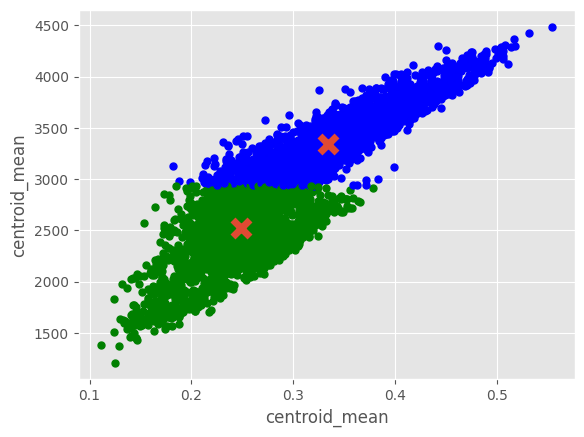

In [385]:
# 2 cluster
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")

data_x = np.array(GenReg_ds[['zero_crossings_mean','centroid_mean']])
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#print(centroids)
#print(labels) # 0-male, 1-Female

colors = ["g.","b."]  #green = male  #blue = female

for i in range(len(data_x)):
    plt.plot(data_x[i][0], data_x[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:,0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.ylabel('centroid_mean')
plt.xlabel('centroid_mean')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


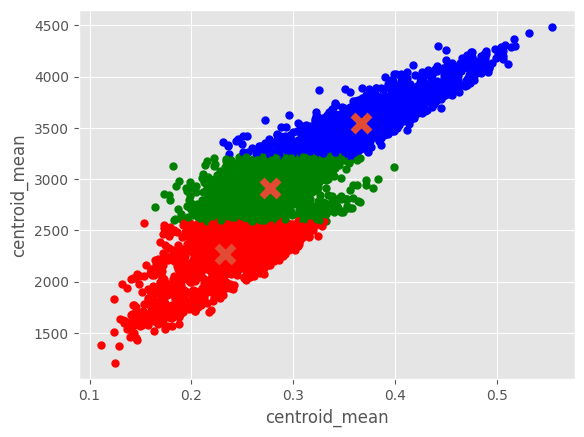

In [386]:
# 3 cluster
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")

data_x = np.array(GenReg_ds[['zero_crossings_mean','centroid_mean']])
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#print(centroids)
#print(labels) # 0-male, 1-Female

colors = ["g.","b.","r."]  #green = male

for i in range(len(data_x)):
    plt.plot(data_x[i][0], data_x[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:,0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.ylabel('centroid_mean')
plt.xlabel('centroid_mean')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


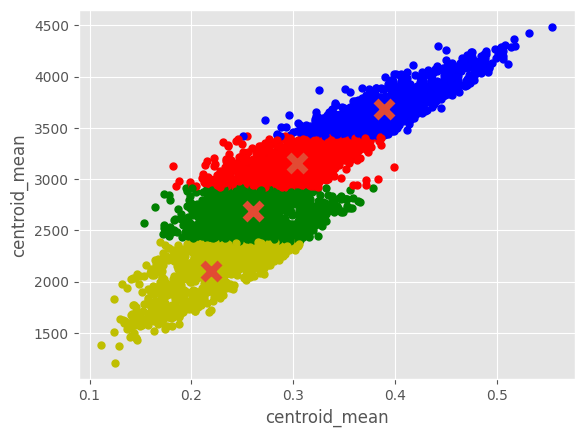

In [387]:
# 4 cluster
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")

data_x = np.array(GenReg_ds[['zero_crossings_mean','centroid_mean']])
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

#print(centroids)
#print(labels) # 0-male, 1-Female

colors = ["g.","b.","r.","y."]  #green = male

for i in range(len(data_x)):
    plt.plot(data_x[i][0], data_x[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:,0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.ylabel('centroid_mean')
plt.xlabel('centroid_mean')

plt.show()

<ipython-input-388-77b18dbfd07b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap( GenReg_ds.corr());


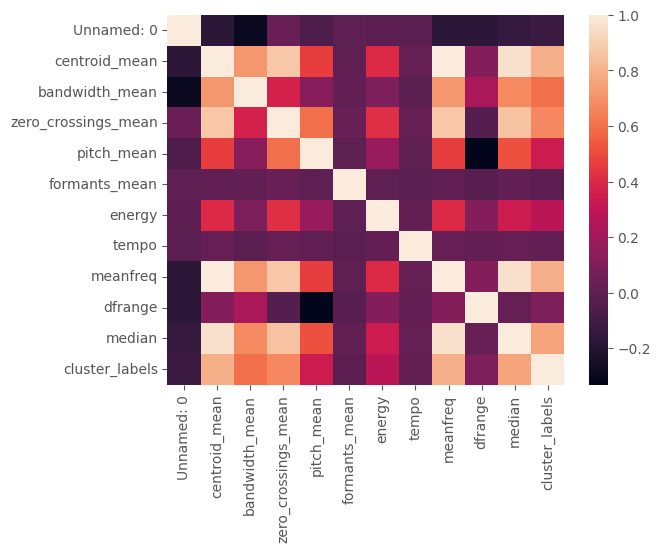

In [388]:
sb.heatmap( GenReg_ds.corr());

In [389]:
GenReg_ds.drop(['centroid_mean'], axis=1, inplace=True)

In [390]:
GenReg_ds.drop(['bandwidth_mean'], axis=1, inplace=True)

In [391]:
GenReg_ds.columns

Index(['Unnamed: 0', 'voice_filename', 'transcript', 'accent', 'gender',
       'tone', 'mfcc_mean', 'chroma_mean', 'contrast_mean',
       'zero_crossings_mean', 'pitch_mean', 'formants_mean', 'energy', 'tempo',
       'meanfreq', 'dfrange', 'median', 'label', 'cluster_labels'],
      dtype='object')

Text(0, 0.5, 'No. of persons')

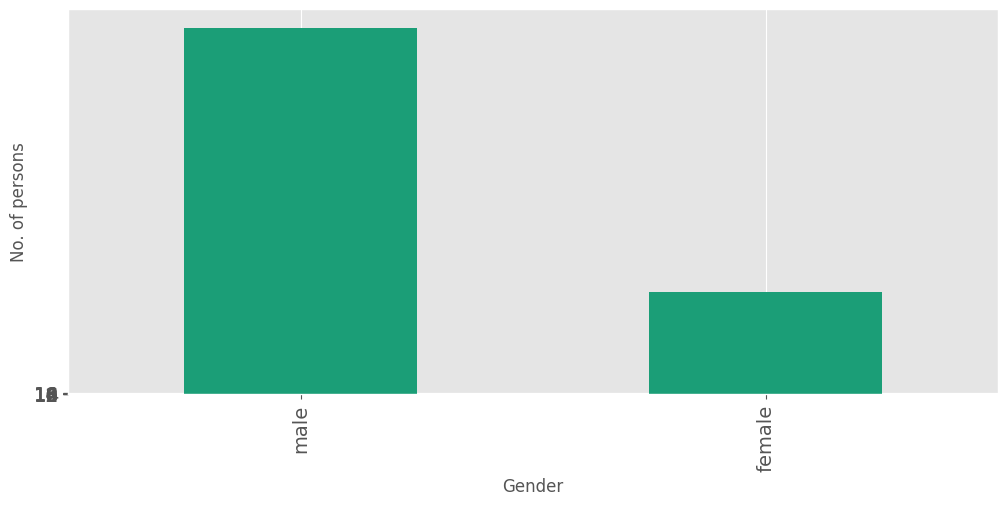

In [392]:
GenReg_ds['label'].value_counts().plot(kind='bar',figsize = (12,5),fontsize = 14,colormap='Dark2', yticks=np.arange(0, 19, 2))
plt.xlabel('Gender')
plt.ylabel('No. of persons')